In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
prodata = pd.read_csv('prodata_refined.csv')

#drop duplicates
#prodata.drop_duplicates()

#show sample
prodata.head()

Team    Player                              Game  \
0  Streamer   n0thing  Counter Strike: Global Offensive   
1  Streamer    shroud  Counter Strike: Global Offensive   
2    EG (S)  Stewie2k  Counter Strike: Global Offensive   
3    Titans       MSL  Counter Strike: Global Offensive   
4  Vitality    Magisk  Counter Strike: Global Offensive   

                               Mouse Mouse HZ  DPI  Sensitivity   eDPI  \
0              Logitech G100s Custom      500  400          2.0    800   
1       Logitech G303 Shroud Edition    1,000  450          2.4  1,080   
2  Logitech G Pro X Superlight Black    1,000  400          2.0    800   
3         Zowie EC2-B Divina Edition    1,000  400          1.6    640   
4            Razer DeathAdder V3 Pro    4,000  800          1.0    800   

             Monitor  Monitor HZ             GPU Resolution Aspect Ratio  \
0  Alienware AW2521H       360.0        RTX 3090  1920x1080         16:9   
1  Alienware AW2721D       240.0        RTX 3090  2560x1440         16:9   
2       BenQ XL2546K       360.0  RTX 2080 Super   1024x768          4:3   
3        BenQ XL2546       240.0     GTX 1080 Ti   1280x960          4:3   
4        BenQ XL2546       240.0        RTX 3080  1680x1050        16:10   

                Mousepad                   Keyboard  \
0  SteelSeries QcK Heavy         HyperX Alloy Elite   
1       Logitech G840 SE     Logitech G Pro X MK SE   
2  SteelSeries QcK Heavy              Logitech G512   
3  SteelSeries QcK Heavy  SteelSeries APEX M750 TKL   
4           VAXEE PA Y22      Razer Huntsman V2 TKL   

                                Headset  
0  Logitech G Pro X Wireless Headset SE  
1  Logitech G Pro X Wireless Headset SE  
2                       HyperX Cloud II  
3                SteelSeries Arctis Pro  
4                          Corsair HS80

Aspect Ratio
14:9       1
16:10     43
16:9     236
4:3      435
5:4       27
Name: Game, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

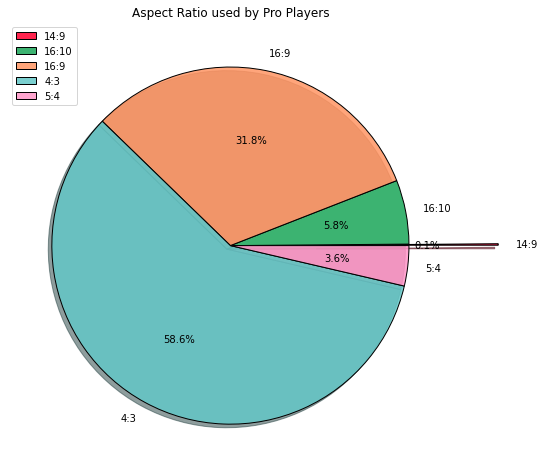

In [4]:
#Most popular aspect ratio used by pros
pros = prodata.groupby(by=prodata['Aspect Ratio'])
print(pros['Game'].count())

#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = []
for i in pros['Aspect Ratio'].unique():
    for a in i:
        labels.append(a)

colors =[red,c,orang,blug,mag]
explode = [0.5,0,0,0,0]
labels

plt.title('Aspect Ratio used by Pro Players')
plt.pie(pros['Game'].count(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

fig = plt.gcf()
fig.set_size_inches(8,10)
plt.legend(loc='best')
plt.show

4:3      394
16:9      65
16:10     30
5:4       21
Name: Aspect Ratio, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

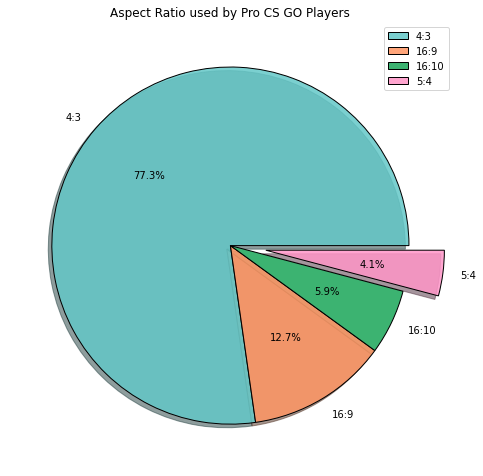

In [5]:
#drill down and look at data for cs pros only
cs = prodata[prodata['Game']== 'Counter Strike: Global Offensive']
print(cs['Aspect Ratio'].value_counts())


#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = ['4:3','16:9','16:10','5:4']    
colors =[blug,orang,c,mag,red]
explode = [0,0,0,0.2]

plt.title('Aspect Ratio used by Pro CS GO Players')
plt.pie(cs['Aspect Ratio'].value_counts(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

fig = plt.gcf()
fig.set_size_inches(8,10)
plt.legend(loc='best')
plt.show

16:9     171
4:3       41
16:10     13
5:4        6
14:9       1
Name: Aspect Ratio, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

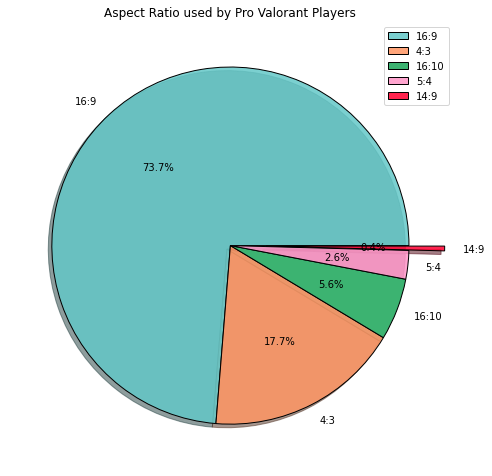

In [6]:
#drill down and look at data for VALORANT pros only
val = prodata[prodata['Game']== 'VALORANT']
print(val['Aspect Ratio'].value_counts())

#colors
orang = '#ff9664d9'
blug = '#64c8c8d9'
mag='#ff96c8d9'
red = '#ff0032d9'
c = 'mediumseagreen'

labels = ['16:9','4:3','16:10','5:4','14:9']    
colors =[blug,orang,c,mag,red]
explode = [0,0,0,0,0.2]

plt.title('Aspect Ratio used by Pro Valorant Players')
plt.pie(val['Aspect Ratio'].value_counts(),explode,labels=labels,colors=colors,shadow = True,autopct='%1.1f%%'
        ,wedgeprops={'edgecolor':'black'})

fig = plt.gcf()
fig.set_size_inches(8,10)
plt.legend(loc='best')
plt.show

240.0    679
360.0     38
144.0     13
165.0      1
Name: Monitor HZ, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


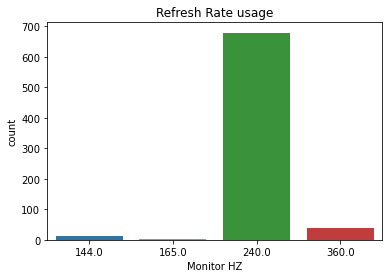

In [8]:
print(prodata['Monitor HZ'].value_counts())

#stretched vs. black bars and why?
sns.countplot(prodata['Monitor HZ'])
plt.title('Refresh Rate usage')
plt.show()

In [28]:
#find duplicate rows if any
#number of total duplicates
print('# of Pro\'s that play both:',prodata.duplicated(subset = 'Player',keep=False).sum())


prodata.loc[prodata['Team'] == 'Streamer','Game'] = 'Streamer'
prodata

# of Pro's that play both: 20


Team     Player                              Game  \
0         Streamer    n0thing                          Streamer   
1         Streamer     shroud                          Streamer   
2           EG (S)   Stewie2k  Counter Strike: Global Offensive   
3           Titans        MSL  Counter Strike: Global Offensive   
4         Vitality     Magisk  Counter Strike: Global Offensive   
..             ...        ...                               ...   
737       Streamer  iiTzTimmy                          Streamer   
738             FA   governor                          VALORANT   
739  MAD Lions (B)        xms                          VALORANT   
740        NIP (B)       xand                          VALORANT   
741   Heretics (S)    SirMaza                          VALORANT   

                                 Mouse Mouse HZ    DPI  Sensitivity   eDPI  \
0                Logitech G100s Custom      500    400         2.00    800   
1         Logitech G303 Shroud Edition    1,000    450         2.40  1,080   
2    Logitech G Pro X Superlight Black    1,000    400         2.00    800   
3           Zowie EC2-B Divina Edition    1,000    400         1.60    640   
4              Razer DeathAdder V3 Pro    4,000    800         1.00    800   
..                                 ...      ...    ...          ...    ...   
737        Logitech G Pro X Superlight    1,000  1,800         0.19    342   
738           FinalMouse Starlight Pro    1,000  1,200         0.45    540   
739            Razer DeathAdder V3 Pro    1,000    800         0.45    360   
740        Logitech G Pro X Superlight    1,000    800         0.51    408   
741        Logitech G Pro X Superlight    1,000    400         0.50    200   

               Monitor  Monitor HZ             GPU Resolution Aspect Ratio  \
0    Alienware AW2521H       360.0        RTX 3090  1920x1080         16:9   
1    Alienware AW2721D       240.0        RTX 3090  2560x1440         16:9   
2         BenQ XL2546K       360.0  RTX 2080 Super   1024x768          4:3   
3          BenQ XL2546       240.0     GTX 1080 Ti   1280x960          4:3   
4          BenQ XL2546       240.0        RTX 3080  1680x1050        16:10   
..                 ...         ...             ...        ...          ...   
737        BenQ XL2740       240.0     RTX 3080 Ti  1920x1080         16:9   
738        BenQ XL2740       240.0     RTX 3070 Ti  1920x1080         16:9   
739        BenQ XL2540       240.0        RTX 3080  1920x1080         16:9   
740       BenQ XL2546K       240.0  RTX 2070 Super  1920x1080         16:9   
741       ASUS VG259QM       240.0        RTX 3080  1920x1080         16:9   

                  Mousepad                   Keyboard  \
0    SteelSeries QcK Heavy         HyperX Alloy Elite   
1         Logitech G840 SE     Logitech G Pro X MK SE   
2    SteelSeries QcK Heavy              Logitech G512   
3    SteelSeries QcK Heavy  SteelSeries APEX M750 TKL   
4             VAXEE PA Y22      Razer Huntsman V2 TKL   
..                     ...                        ...   
737       Logitech G840 SE              Wooting 60 HE   
738       SteelSeries QcK+           Ducky One 3 Mini   
739             Zowie G-SR            Ducky One 2 RGB   
740         VAXEE PA ZYGEN          Logitech G915 TKL   
741            ZOWIE GTF-X       HyperX Alloy FPS Pro   

                                  Headset  
0    Logitech G Pro X Wireless Headset SE  
1    Logitech G Pro X Wireless Headset SE  
2                         HyperX Cloud II  
3                  SteelSeries Arctis Pro  
4                            Corsair HS80  
..                                    ...  
737  Logitech G Pro X Wireless Headset SE  
738               Beyerdynamic DT 990 Pro  
739                       HyperX Cloud II  
740                    HyperX Cloud Alpha  
741           Beyerdynamic DT 880 Edition  

[742 rows x 16 columns]

In [29]:
#A very interesting record
prodata[prodata['Player'] =='Stewie2k']

Team    Player                              Game  \
2    EG (S)  Stewie2k  Counter Strike: Global Offensive   
524  EG (S)  Stewie2k                          VALORANT   

                                 Mouse Mouse HZ  DPI  Sensitivity eDPI  \
2    Logitech G Pro X Superlight Black    1,000  400         2.00  800   
524  Logitech G Pro X Superlight Black    1,000  400         0.61  244   

               Monitor  Monitor HZ             GPU Resolution Aspect Ratio  \
2         BenQ XL2546K       360.0  RTX 2080 Super   1024x768          4:3   
524  Alienware AW2521H       360.0     RTX 2080 Ti  1920x1080         16:9   

                  Mousepad       Keyboard          Headset  
2    SteelSeries QcK Heavy  Logitech G512  HyperX Cloud II  
524  SteelSeries QcK Heavy  Logitech G512  HyperX Cloud II